## Importing Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
%matplotlib inline
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [20]:
# Load the new dataset
df = pd.read_csv("AEP_HOURLY.csv")


In [21]:
# Extract all Data Like Year Month Day Time etc
dataset = df
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.time
dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.isocalendar().week ## because the week package has been , deprecated by developers
dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
dataset = df.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(1)

,AEP_MW,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2023-01-01,13478.0,1,2023,2023-01-01,00:00:00,52,Sunday


In [28]:
# How many Unique Year do we Have in Dataset 
print(df.Year.unique(),"\n")
print("Total Number of Unique Year", df.Year.nunique(), "\n")

[2023 2024 2025 2026 2027 2028 2029 2030 2031 2032 2033 2034 2035 2036
 2037 2038 2039 2040 2041 2042 2043 2044 2045 2046 2047 2048 2049 2050
 2051 2052 2053 2054 2055 2056 2057 2058 2059 2060 2061 2062 2063 2064
 2065 2066 2067 2068 2069 2070 2071 2072] 

Total Number of Unique Year 50 



/tmp/ipykernel_15358/3596599376.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0.5, 1.0, 'Energy Consumption According to Year')

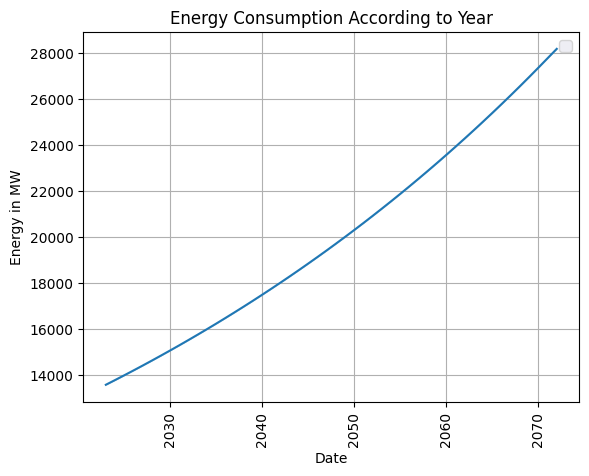

In [30]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Year"], y=dataset["AEP_MW"], data=df)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Energy consumptionnin Year 2004")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Energy Consumption According to Year")

/tmp/ipykernel_15358/1202724965.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


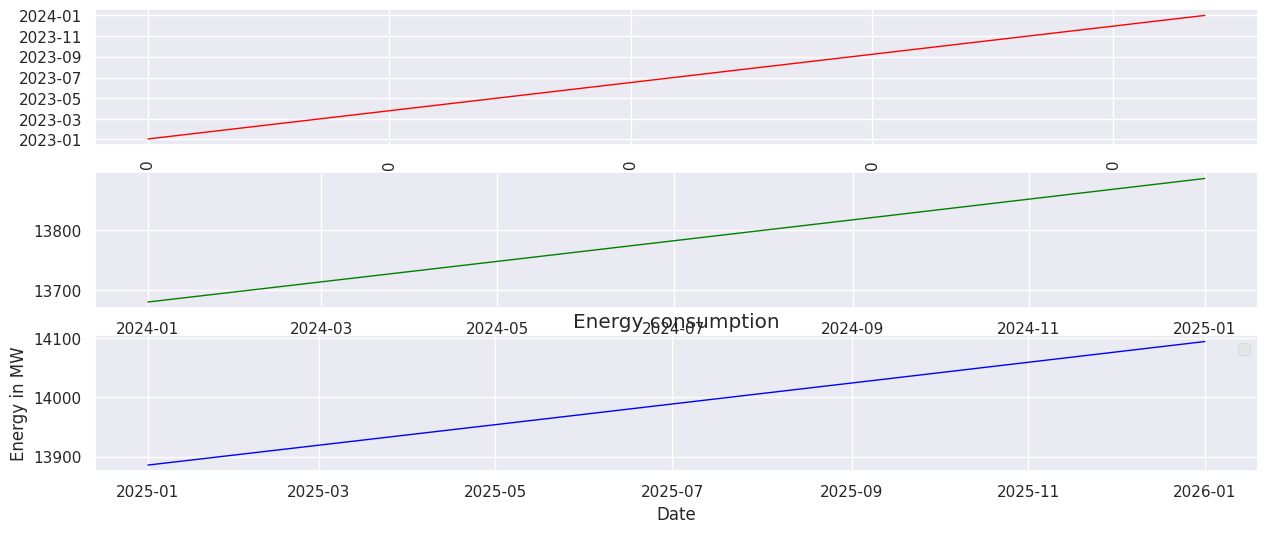

In [31]:
from matplotlib import style
import matplotlib.pyplot as plt

fig = plt.figure()

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

style.use('ggplot')

# Ensure the Datetime column is parsed and set as the index
dataset.index = pd.to_datetime(dataset.index)

# Filter the dataset by year
data_2023 = dataset.loc['2023']
data_2024 = dataset.loc['2024']
data_2025 = dataset.loc['2025']

y_2023 = data_2023["AEP_MW"].to_list()
x_2023 = data_2023.index.to_list()
ax1.plot(x_2023, color="red", linewidth=1)

y_2024 = data_2024["AEP_MW"].to_list()
x_2024 = data_2024.index.to_list()
ax2.plot(x_2024, y_2024, color="green", linewidth=1)

y_2025 = data_2025["AEP_MW"].to_list()
x_2025 = data_2025.index.to_list()
ax3.plot(x_2025, y_2025, color="blue", linewidth=1)

plt.rcParams["figure.figsize"] = (18, 8)
plt.title("Energy consumption")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

Text(0.5, 1.0, 'Ennergy Distribution')

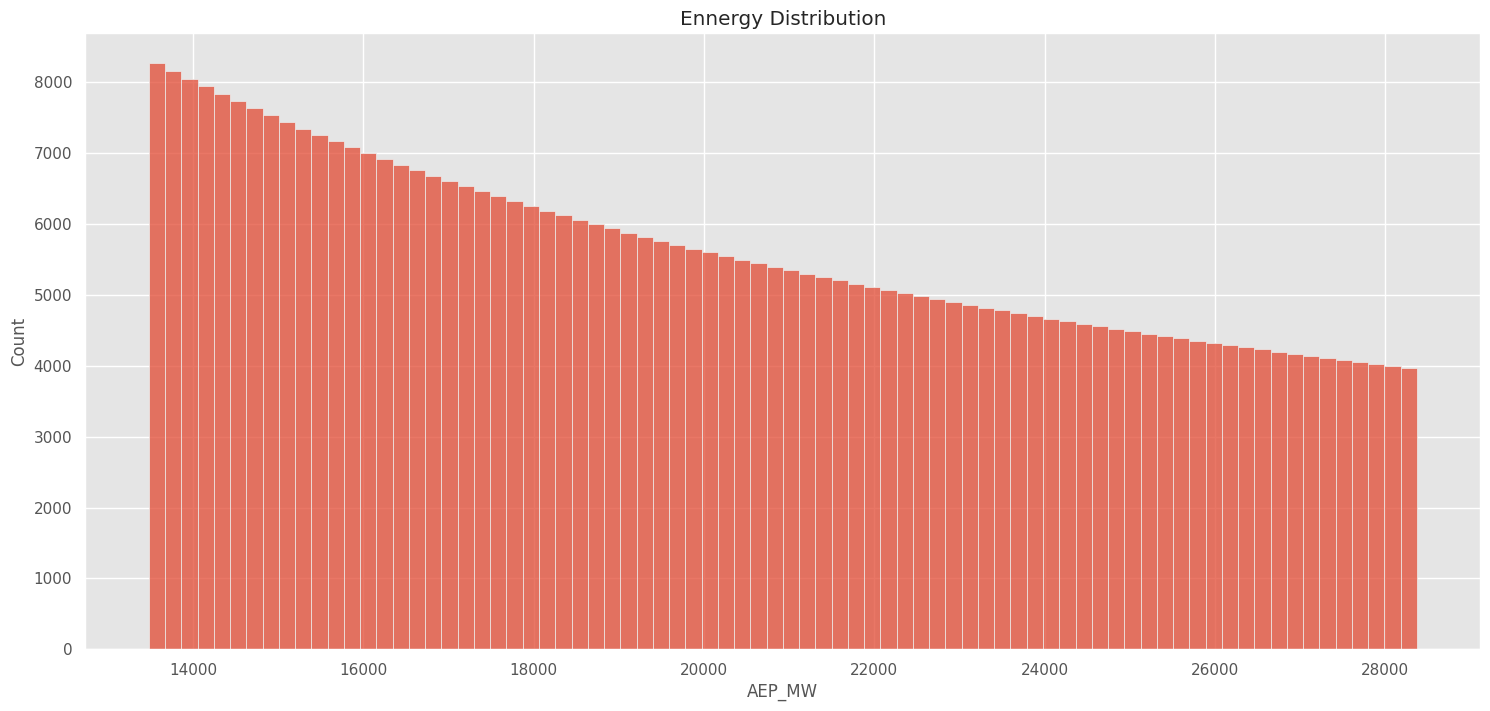

In [32]:
sns.histplot(dataset["AEP_MW"])  ##we're not gonna use the distplot , coz it's been deprecated by the seaborn library
plt.title("Ennergy Distribution")

/tmp/ipykernel_15358/734829381.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


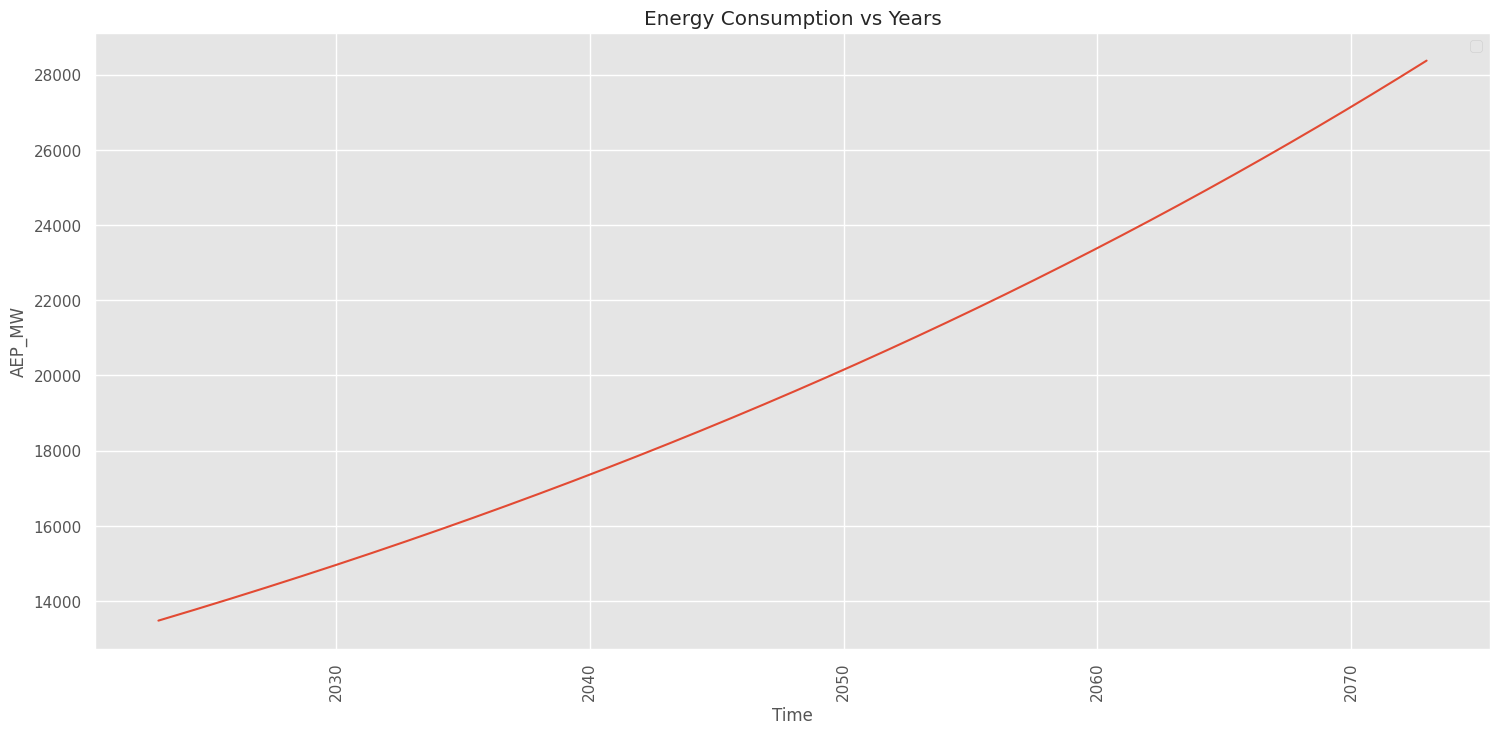

In [33]:
# Ensur the Time column is parsed as a datetime object
dataset["Time"] = pd.to_datetime(dataset["Time"], format='%H:%M:%S').dt.time

fig = plt.figure()
ax1 = fig.add_subplot(111)

# Plotting the data
sns.lineplot(x=dataset.index, y=dataset["AEP_MW"], data=dataset)
plt.title("Energy Consumption vs Years")
plt.xlabel("Time")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

plt.show()


/tmp/ipykernel_15358/1592424438.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


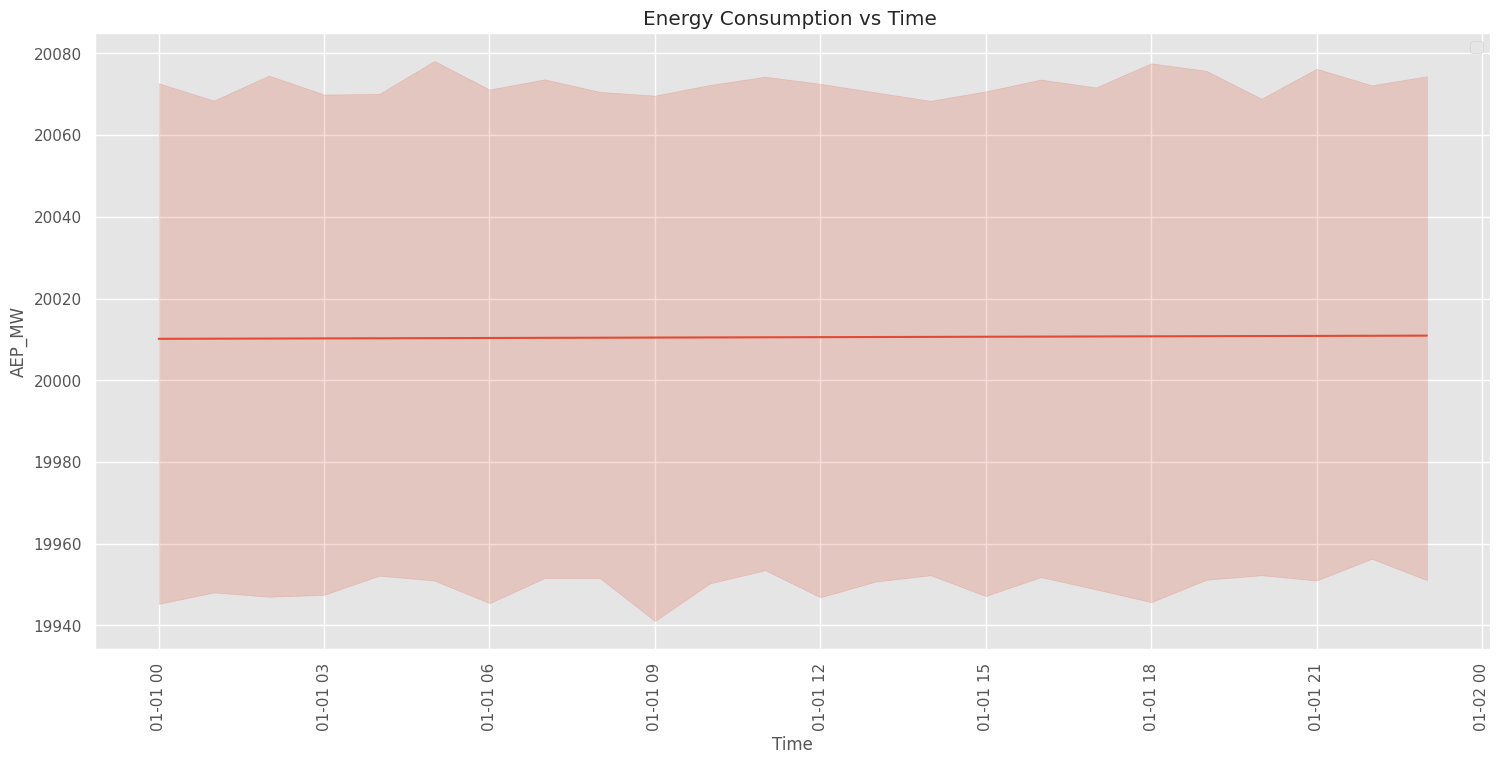

In [34]:
fig = plt.figure()
ax1= fig.add_subplot(111)

dataset["Time"] = pd.to_datetime(dataset["Time"], format='%H:%M:%S').dt.time
sns.lineplot(x=pd.to_datetime(dataset["Time"], format='%H:%M:%S'), y=dataset["AEP_MW"], data=df)
plt.title("Energy Consumption vs Time ")
plt.xlabel("Time")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

In [36]:
# Load the dataset
df = pd.read_csv("AEP_HOURLY.csv")

In [37]:
# Ensure the 'Datetime' column is parsed as datetime and set as the index
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)

In [38]:
# Resample the dataset to daily frequency and take the mean
NewDataSet = df.resample('D').mean()

In [39]:
# Print shapes of old and new datasets
print("Old Dataset ", df.shape)
print("New Dataset ", NewDataSet.shape)

Old Dataset  (438000, 1)
New Dataset  (18250, 1)


In [40]:
# Split the dataset into training and test sets
TestData = NewDataSet.tail(100)
Training_Set = NewDataSet.iloc[:, 0:1]
Training_Set = Training_Set[:-60]

In [41]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (18190, 1)
Test Set Shape  (100, 1)


In [42]:
# Convert training set to numpy array
Training_Set = Training_Set.values

In [43]:
# Scale the training set
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)


In [44]:
# Create sequences for training
X_Train = []
Y_Train = []

for i in range(60, Train.shape[0]):
    X_Train.append(Train[i-60:i])
    Y_Train.append(Train[i])

# Convert to numpy arrays
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(18130, 60, 1)
(18130, 1)


In [45]:
# Flatten the input data for SVM
X_Train_flattened = X_Train.reshape(X_Train.shape[0], -1)


In [46]:
# Define the SVR model
svr = SVR()

In [47]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'kernel': ['rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': [1e-3, 1e-4, 'scale', 'auto']
}

In [48]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

In [49]:
# Train the SVR model using GridSearchCV
grid_search.fit(X_Train_flattened, Y_Train.ravel())


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.2s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.3s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.2s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.4s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.3s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.1, gamma=auto

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.001, 0.0001, 'scale', 'auto'],
                         'kernel': ['rbf']},
             scoring='neg_mean_squared_error', verbose=2)

In [50]:
# Get the best model from grid search
best_svr = grid_search.best_estimator_


In [52]:
# Function to predict data for a particular year
def predict_for_year(year, model, scaler, dataset, sequence_length=60):
    # Filter the data for the desired year
    year_data = dataset[dataset.index.year == year]
    
    # Ensure there is enough data for prediction
    if len(year_data) < sequence_length:
        raise ValueError(f"Not enough data to create sequences for the year {year}.")
    
    # Prepare the inputs for the test set
    inputs = year_data.values
    
    # Reshape the inputs
    inputs = inputs.reshape(-1, 1)
    
    # Normalize the dataset
    inputs = scaler.transform(inputs)
    
    # Create sequences for testing
    X_test = []
    for i in range(sequence_length, len(inputs)):
        X_test.append(inputs[i-sequence_length:i])
    
    # Convert into Numpy Array
    X_test = np.array(X_test)
    
    # Flatten the input data for SVM
    X_test_flattened = X_test.reshape(X_test.shape[0], -1)
    
    # Pass to the SVM model
    predicted_values = model.predict(X_test_flattened)
    
    # Reshape predicted_values to 2D array for inverse transformation
    predicted_values = predicted_values.reshape(-1, 1)
    
    # Do inverse transformation to get values
    predicted_values = scaler.inverse_transform(predicted_values)
    
    return predicted_values, year_data.index[sequence_length:]

In [65]:
# Predict data for a particular year, e.g., 2025
predicted_2028, dates_2028 = predict_for_year(2028, best_svr, sc, NewDataSet)

In [66]:
# Convert predictions to list for consistency with existing code
Predicted_MegaWatt = [x[0] for x in predicted_2028]

In [67]:
# Prepare data for visualization
True_MegaWatt = NewDataSet[NewDataSet.index.year == 2025]["AEP_MW"].to_list()[:len(Predicted_MegaWatt)]
dates = dates_2028.to_list()

Machine_Df = pd.DataFrame(data={
    "Date": dates,
    "TrueMegaWatt": True_MegaWatt,
    "PredictedMeagWatt": Predicted_MegaWatt
})


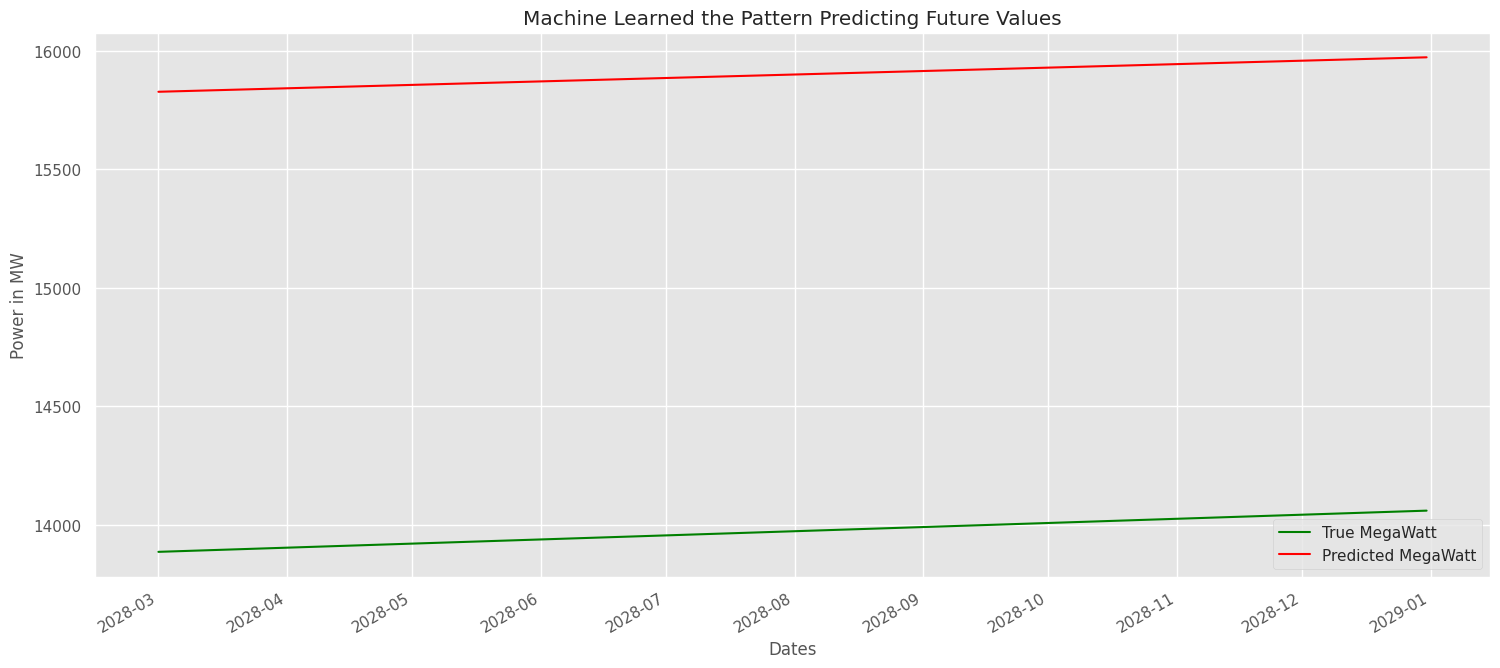

In [68]:
# Visualize the results
fig = plt.figure()
ax1 = fig.add_subplot(111)

x = dates
y = True_MegaWatt
y1 = Predicted_MegaWatt

plt.plot(x, y, color="green", label="True MegaWatt")
plt.plot(x, y1, color="red", label="Predicted MegaWatt")
plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel("Power in MW")
plt.title("Machine Learned the Pattern Predicting Future Values")
plt.legend()
plt.show()

In [57]:
# Evaluation Metrics
y_true = np.array(True_MegaWatt)  # True values
y_pred = np.array(Predicted_MegaWatt)  # Predicted values

In [69]:
# Mean Absolute Error
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 1416.448923862408


In [59]:
# Mean Squared Error
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 2006428.6948352805


In [60]:
# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 1416.4846256967567


In [61]:
# R-squared
r2 = r2_score(y_true, y_pred)
print(f"R-squared (R2): {r2}")

R-squared (R2): -795.7642948006469


In [62]:
# Mean Absolute Percentage Error
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

Mean Absolute Percentage Error (MAPE): 10.137674561158384%


In [63]:
# Explained Variance Score
evs = explained_variance_score(y_true, y_pred)
print(f"Explained Variance Score: {evs}")

Explained Variance Score: 0.9598363612731231
